K-Means is actually one of the simplest unsupervised clustering algorithm. Assume we have input data points $x_1,x:2,x:3,…,x_n$ and value of K(the number of clusters needed). We follow the below procedure:

1. Pick K points as the initial centroids from the data set, either randomly or the first K.

2. Find the Euclidean distance of each point in the data set with the identified K points — cluster centroids.

3. Assign each data point to the closest centroid using the distance found in the previous step.

4. Find the new centroid by taking the average of the points in each cluster group.

5. Repeat 2 to 4 for a fixed number of iteration or till the centroids don’t change.


In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import style
style.use('ggplot')
import matplotlib.colors as colors
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

To make our work organized we will build a class and proceed as in the steps above and also define a tolerance or threshold value for the SSE’s.

In [4]:
from abc import ABC, abstractmethod
import warnings
from sklearn.utils import check_random_state

from sklearn.base import (
    BaseEstimator,
    ClusterMixin,
    TransformerMixin
)

class KMeans( TransformerMixin, ClusterMixin, BaseEstimator, ABC):
    def __init__(self,  n_clusters=2, tol=0.001, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.tol = #TODO 
        self.max_iter = #TODO 
        self.random_state = #TODO 

    def fit(self,data):
        random_state = check_random_state(self.random_state)
        self.cluster_centers_ = {}
        n_samples, n_features = data.shape
        self.labels_ = np.full(n_samples, -1, dtype=np.int32)

        #Step 1
        idx =#TODO -- np.random.choice

        for i in range(self.n_clusters):
            self.cluster_centers_[i] = data[idx[i]]

        for i in range(self.max_iter):
            self.cluster_data_ = {}

            for j in range(self.n_clusters):
                self.cluster_data_[j] = []
            
            indx=0
            for element in data:
                #Step 2
                distances =  #TODO -- for all centroids using np.linalg.norm

                #Step 3
                classification = #TODO -- get index of min element distances
                self.cluster_data_[classification].append(element)
                self.labels_[indx]=classification
                indx=indx+1

            prev_centroids = dict(self.cluster_centers_)

            for classification in self.cluster_data_:
                #Step 4
                self.cluster_centers_[classification] =  #TODO -- np.average

            optimized = True
            
            for c in self.cluster_centers_:
                original_centroid = prev_centroids[c]
                current_centroid = self.cluster_centers_[c]

                #Check of Step 5
                change =#TODO -- np.linalg.norm             
                print("Step: "+str(i)+" -- current centroid: " + str(current_centroid)+ "; original: "+ str(original_centroid)+ "; change: "+str(change))              
                if change > self.tol:
                    optimized = False

            if optimized:
                break
                
        return self

    def predict(self,data):
        pred=np.full(len(data), -1, dtype=np.int32)
        indx=0
        for elem in data:
          distances = #TODO See step 2
          classification = distances.index(min(distances))
          pred[indx]=classification
          indx=indx+1

        return pred

    def fit_predict(self,data):
      return self.fit(data).labels_

Now we can test our code

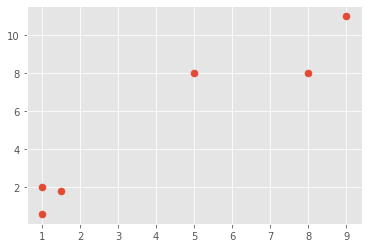

In [5]:

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11]])


colors_list = list(colors._colors_full_map.values())
plt.scatter(X[:,0], X[:,1], s=50)
plt.show()


In [6]:
model = KMeans(n_clusters=2)
X_labels=model.fit(X).labels_
print(X_labels)

Step: 0 -- current centroid: [ 9. 11.]; original: [ 9. 11.]; change: 0.0
Step: 0 -- current centroid: [3.3  4.08]; original: [8. 8.]; change: 6.120163396511567
Step: 1 -- current centroid: [8.5 9.5]; original: [ 9. 11.]; change: 1.5811388300841898
Step: 1 -- current centroid: [2.125 3.1  ]; original: [3.3  4.08]; change: 1.5300408491278914
Step: 2 -- current centroid: [7.33333333 9.        ]; original: [8.5 9.5]; change: 1.269295517643985
Step: 2 -- current centroid: [1.16666667 1.46666667]; original: [2.125 3.1  ]; change: 1.8937213510850945
Step: 3 -- current centroid: [7.33333333 9.        ]; original: [7.33333333 9.        ]; change: 0.0
Step: 3 -- current centroid: [1.16666667 1.46666667]; original: [1.16666667 1.46666667]; change: 0.0
[1 1 0 0 1 0]


In [7]:
model.cluster_data_

{0: [array([5., 8.]), array([8., 8.]), array([ 9., 11.])],
 1: [array([1., 2.]), array([1.5, 1.8]), array([1. , 0.6])]}

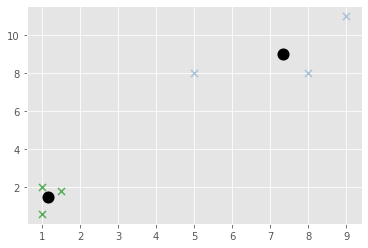

In [8]:
for centroid in model.cluster_centers_:
    plt.scatter(model.cluster_centers_[centroid][0], model.cluster_centers_[centroid][1],
                marker="o", color="k", s=50, linewidths=5)


for classification in model.cluster_data_:
    color = colors_list[classification]
    for element in model.cluster_data_[classification]:
        plt.scatter(element[0], element[1], marker="x", color=color, s=50, linewidths=5)

plt.show()